In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stockmarketprediction/AAPL.csv


In [1]:
import pandas as pd
import pandas_datareader as pdr


In [2]:
df = pd.read_csv("/kaggle/input/stockmarketprediction/AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [12]:
df1 = df.reset_index()['close']
df1.shape

(1258,)

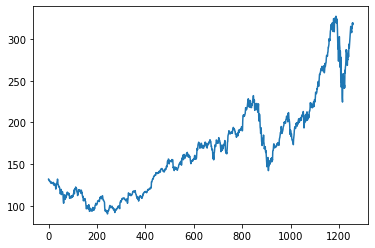

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
#Transforming values between 0 - 1 for scalability 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))  #-1,1 for transform function
df1.shape

(1258, 1)

In [16]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [17]:
#Time series split ? ---> Training = 70% Test = 30% (there is data dependency)

training_size = int(len(df1)*0.65)
test_size = len(df1)- training_size

train_data, test_data = df1[0:training_size,:] , df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
#Data preprocessing


def create_dataset(dataset,timestep=1):
    dataX , dataY  = [] , []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX) , np.array(dataY)

In [20]:
time_step = 100  #the previuos n- data steps to consider for prediction/
x_train , y_train = create_dataset(train_data,time_step)
x_test , y_test = create_dataset(test_data,time_step)

In [22]:
x_train  , x_test

(array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
         0.09085536],
        [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
         0.0873934 ],
        [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
         0.09030651],
        ...,
        [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
         0.5062062 ],
        [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
         0.51920966],
        [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
         0.53719497]]),
 array([[0.52651355, 0.52837119, 0.53119986, ..., 0.26154691, 0.25187875,
         0.26483999],
        [0.52837119, 0.53119986, 0.53871485, ..., 0.25187875, 0.26483999,
         0.27273495],
        [0.53119986, 0.53871485, 0.5461454 , ..., 0.26483999, 0.27273495,
         0.2766191 ],
        ...,
        [0.81875369, 0.84256523, 0.84210082, ..., 0.92544119, 0.91771511,
         0.9483239 ],
        [0.8

In [23]:
x_train.shape ,y_train.shape

((716, 100), (716,))

In [24]:
#For lstm reshape into 3-D

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM


In [29]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))     #first input shape should be that of x_train
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 0s 22ms/step - loss: 3.6914e-04 - accuracy: 0.0014 - val_loss: 0.0036 - val_accuracy: 0.0029
Epoch 2/100
12/12 [==============================] - 0s 19ms/step - loss: 5.3527e-04 - accuracy: 0.0014 - val_loss: 0.0028 - val_accuracy: 0.0029
Epoch 3/100
12/12 [==============================] - 0s 20ms/step - loss: 6.0204e-04 - accuracy: 0.0014 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 4/100
12/12 [==============================] - 0s 20ms/step - loss: 4.5060e-04 - accuracy: 0.0014 - val_loss: 0.0030 - val_accuracy: 0.0029
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 3.7621e-04 - accuracy: 0.0014 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 3.3004e-04 - accuracy: 0.0014 - val_loss: 0.0016 - val_accuracy: 0.0029
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 3.4592e-04 - accuracy: 0.0014 - val_loss: 0.0021 -

Epoch 57/100
12/12 [==============================] - 0s 24ms/step - loss: 1.8072e-04 - accuracy: 0.0014 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 58/100
12/12 [==============================] - 0s 19ms/step - loss: 1.7502e-04 - accuracy: 0.0014 - val_loss: 0.0014 - val_accuracy: 0.0029
Epoch 59/100
12/12 [==============================] - 0s 19ms/step - loss: 1.7504e-04 - accuracy: 0.0014 - val_loss: 0.0019 - val_accuracy: 0.0029
Epoch 60/100
12/12 [==============================] - 0s 19ms/step - loss: 1.7799e-04 - accuracy: 0.0014 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 61/100
12/12 [==============================] - 0s 19ms/step - loss: 1.7217e-04 - accuracy: 0.0014 - val_loss: 0.0015 - val_accuracy: 0.0029
Epoch 62/100
12/12 [==============================] - 0s 19ms/step - loss: 1.7335e-04 - accuracy: 0.0014 - val_loss: 0.0017 - val_accuracy: 0.0029
Epoch 63/100
12/12 [==============================] - 0s 18ms/step - loss: 1.8183e-04 - accuracy: 0.0014 - val_loss: 0

In [33]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [34]:
# reverting back to the main original form from the scaled one 

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [35]:
import math ; from sklearn.metrics import mean_squared_error

In [39]:
print(math.sqrt(mean_squared_error(y_train,train_predict))) ; print(math.sqrt(mean_squared_error(y_test,test_predict)))

142.8563423000204
242.374656617037
